# So you want to be the very best, like no one ever was...
#### An analysis of Pokemon from Generation 1-6 through the lens of an introduction to Pokemon types and statistics, and carrying on to the production of a Pokedex and the strongest Pokemon team.
## Notebook Sections
#### 1. Describing the data
#### 2. Learn about Pokemon typing
#### 3. Pokemon statistics (fighting strengths)
#### 4. Pokemon Battles
#### 5. Pokedex. 

Disclaimer: This will not cover any history of Pokemon or be accurate to real game mechanics such as critical hits and movesets. All Pokemon types and statistics are captured at the Generation 6. All property belongs to the Nintendo Corporation.

In [358]:
import os
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from IPython.display import Image, display
import plotly
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
import plotly.offline as offline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
% matplotlib inline
pd.options.display.max_columns = 100

Datasets are split into two groups - the first file describes each pokemons characteristics (mega evolutions excluded) through Generation 6 (Pokemon X, Y). The next two files include 'combats' which are Pokemon battles between two pokemon whose results are known, and 'pokemon' that includes the fighting attributes, generation number, and legendary status of all Pokemon through Generation 6 including mega evolutions. 

# Describing the data

### Reading in the Datasets and Displaying the Data Format

In [292]:
df_pokemon_char = pd.read_csv('pokemon_characteristics.csv')
df_pokemon_combats = pd.read_csv('combats.csv')
df_pokemon = pd.read_csv('pokemon.csv')

### Checking out the Pokemon characteristics dataset

In [293]:
df_pokemon_char.head()

Number        Name Type_1  Type_2  Total  HP  Attack  Defense  Sp_Atk  \
0       1   Bulbasaur  Grass  Poison    318  45      49       49      65   
1       2     Ivysaur  Grass  Poison    405  60      62       63      80   
2       3    Venusaur  Grass  Poison    525  80      82       83     100   
3       4  Charmander   Fire     NaN    309  39      52       43      60   
4       5  Charmeleon   Fire     NaN    405  58      64       58      80   

   Sp_Def  Speed  Generation  isLegendary  Color  hasGender  Pr_Male  \
0      65     45           1        False  Green       True    0.875   
1      80     60           1        False  Green       True    0.875   
2     100     80           1        False  Green       True    0.875   
3      50     65           1        False    Red       True    0.875   
4      65     80           1        False    Red       True    0.875   

  Egg_Group_1 Egg_Group_2  hasMegaEvolution  Height_m  Weight_kg  Catch_Rate  \
0     Monster       Grass             False      0.71        6.9          45   
1     Monster       Grass             False      0.99       13.0          45   
2     Monster       Grass              True      2.01      100.0          45   
3     Monster      Dragon             False      0.61        8.5          45   
4     Monster      Dragon             False      1.09       19.0          45   

       Body_Style  
0       quadruped  
1       quadruped  
2       quadruped  
3  bipedal_tailed  
4  bipedal_tailed

### Understanding the Scope

In [379]:
print(
    ' There are', len(df_pokemon_char['Number']),
    'Pokemon in the dataset.', '\n', 'The dataset covers',
    len(df_pokemon_char['Generation'].unique()), 'Generations.', '\n', '\n',
    'Pokemon details:', '\n'
    ' There are', len(
        df_pokemon_char['Type_1'].unique()), 'different types and',
    int(
        math.factorial(len(df_pokemon_char['Type_1'].unique())) /
        math.factorial(len(df_pokemon_char['Type_1'].unique()) - 2)),
    'type combinations.', '\n',
    "Each Pokemon's stats are split among 6 statistics: \n",
    '      HP, Attack, Defense, Special Attack, Special Defense, Speed.', '\n',
    'There are', sum(df_pokemon_char['isLegendary']),
    'Legendary Pokemon to find.', '\n', '\n', 'Good luck!')

 There are 721 Pokemon in the dataset. 
 The dataset covers 6 Generations. 
 
 Pokemon details: 
 There are 18 different types and 306 type combinations. 
 Each Pokemon's stats are split among 6 statistics: 
       HP, Attack, Defense, Special Attack, Special Defense, Speed. 
 There are 46 Legendary Pokemon to find. 
 
 Good luck!


# Pokemon Typing

### Understanding primary (Type_1) and secondary (Type_2) typing

Since the typing of a Pokemon determinnes what it is strong against and weak to, typing is one of the most important characteristics to know about both your and your opposing Pokemon. 

In [294]:
# Pokemon colors set to reflect their visuals in game
pkmn_type_colors = [
    '#6890F0',  # Water
    '#A8A878',  # Normal
    '#808080',  # Flying
    '#78C850',  # Grass
    '#F85888',  # Psychic
    '#A8B820',  # Bug
    '#E0C068',  # Ground
    '#A040A0',  # Poison
    '#F08030',  # Fire
    '#B8A038',  # Rock
    '#545454',  # Dark
    '#C03028',  # Fighting
    '#F8D030',  # Electric
    '#c0c0c0',  # Steel
    '#7038F8',  # Dragon
    '#705898',  # Ghost
    '#EE99AC',  # Fairy
    '#98D8D8',  # Ice
]
pkmn_complement = [
    '#4864a8',  # Water
    '#757554',  # Normal
    '#595959',  # Flying
    '#548c38',  # Grass
    '#ad3d5f',  # Psychic
    '#758016',  # Bug
    '#9c8648',  # Ground
    '#702c70',  # Poison
    '#a85921',  # Fire
    '#807027',  # Rock
    '#212121',  # Dark
    '#731c18',  # Fighting
    '#ad9121',  # Electric
    '#737373',  # Steel
    '#432194',  # Dragon
    '#4e3d6a',  # Ghost
    '#a66b78',  # Fairy
    '#6a9797',  # Ice
]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text yticklabel objects>)

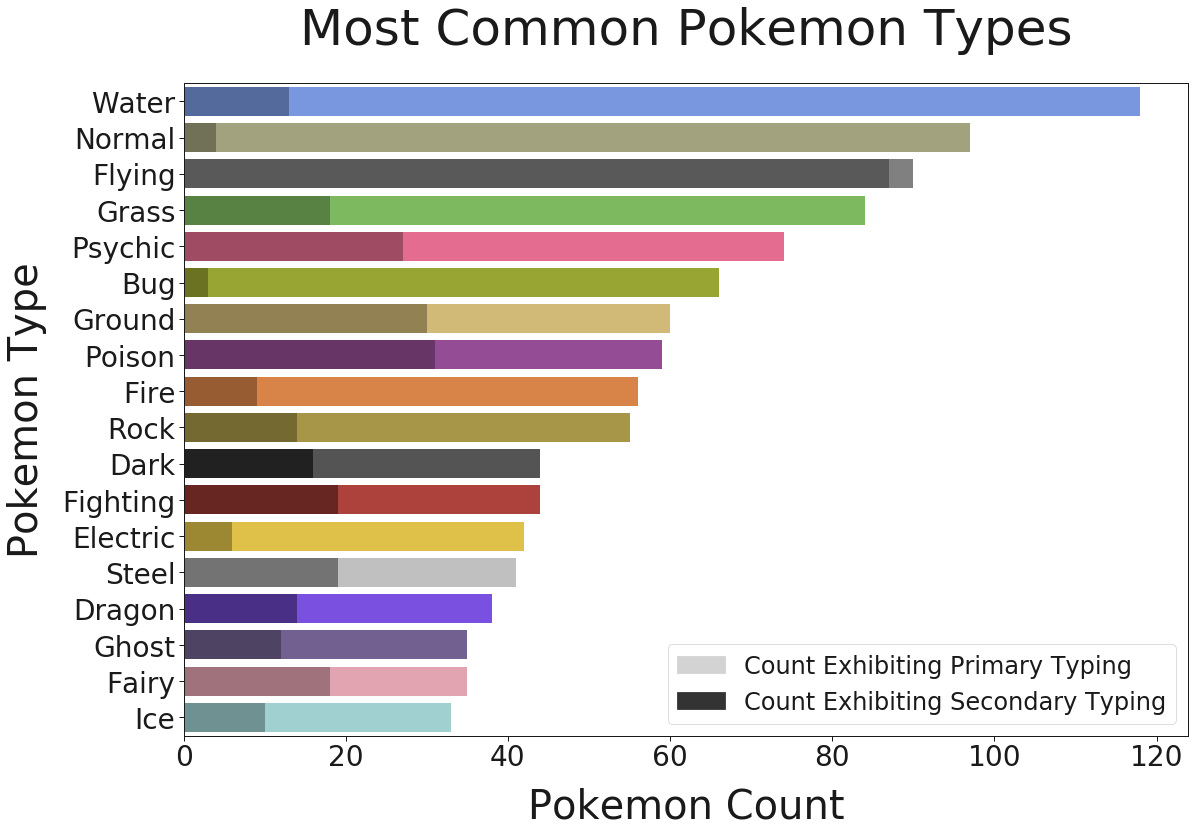

In [435]:
df_count1 = df_pokemon_char['Type_1'].value_counts().reset_index()
df_count2 = df_pokemon_char['Type_2'].value_counts().reset_index()
df_count = df_count1.merge(df_count2, left_on="index", right_on="index")
df_count['count'] = df_count['Type_1'] + df_count['Type_2']
df_count = df_count.sort_values(by='count', ascending=False)

f, ax = plt.subplots(figsize=(18, 12))
sns.barplot(x="count", y="index", data=df_count, palette=pkmn_type_colors)
sns.barplot(x="Type_2", y="index", data=df_count, palette=pkmn_complement)

light_patch = mpatches.Patch(
    color='lightgray', label='Count Exhibiting Primary Typing')
dark_patch = mpatches.Patch(color='#333333', label='Count Exhibiting Secondary Typing')
plt.legend(handles=[light_patch, dark_patch], fontsize=24)
plt.title("Most Common Pokemon Types", y=1.05, fontsize=50)
plt.xlabel("Pokemon Count", labelpad=15, fontsize=40)
plt.ylabel("Pokemon Type", labelpad=15, fontsize=40)
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)
#plt.gcf().subplots_adjust(bottom=0.15, left=0.2)
# plt.savefig('pokemon_types.png')   # save the figure to file

The most popular typing is water, followed by normal and flying. It is not unusual that the least common types are also types that have historically been powerful/legendary, or were introduced in later generations. Fairy, steel, and dark were types introduced in later generations (6, 2, and 2 respectively). Dragon is usually reserved for powerful and/or legendary Pokemon. Ghost and Ice are often found in small, gimmicky parts of the game so there is no need for many Pokemon to be created. 

# Pokemon Statistics

### Viewing Pokemon Stats

Pokemon have 6 types of base statistics - Attack and Defense, Special Attack and Special Defense, Hit Points (HP) and Speed. These are used to calculate damage outputs and the turn in which Pokemon attack during fights. The sum of all 6 base statistics is an approximation of overall strength.

### Checking Distribution of Total Stats

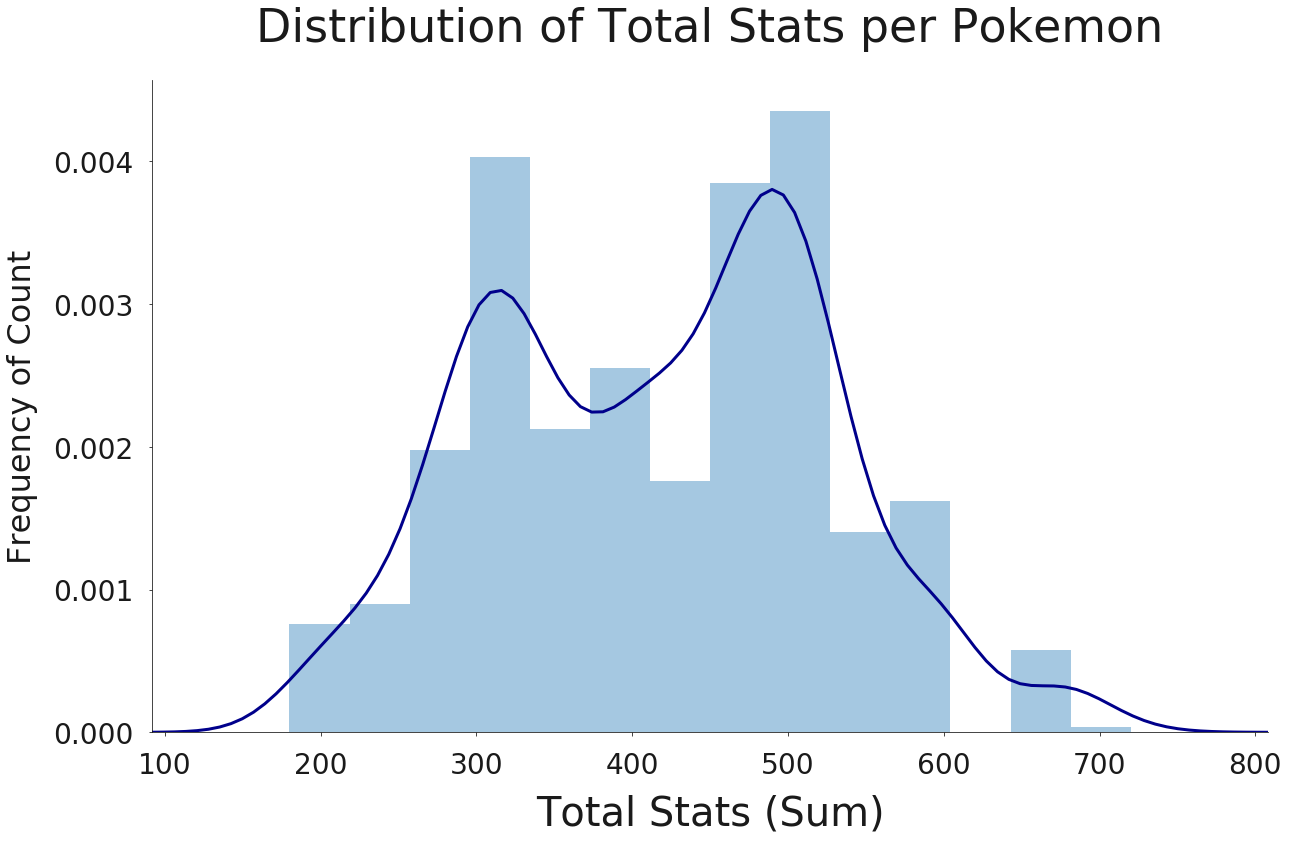

In [350]:
fig, ax = plt.subplots(figsize=(20, 12))
plt.title("Distribution of Total Stats per Pokemon", y=1.05, fontsize=46)
plt.xlabel("Total Stats (Sum)", labelpad=15, fontsize=40)
plt.ylabel("Frequency of Count", labelpad=15, fontsize=32)
ax.tick_params(axis='both', which='major', pad=15)
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)
plt.margins(x=0)
sns.distplot(
    df_pokemon_char['Total'],
    axlabel="Total Stats (Sum)",
    kde_kws={
        "color": "darkblue",
        "lw": 3
    })
sns.despine(top=True, right=True, left=False, bottom=False)
# plt.savefig('pokemon_stats_bare.png')  # save the figure to file

#### Breaking down distributions of each stat

In [437]:
init_notebook_mode(connected=True)

hp = go.Box(y=df_pokemon_char['HP'], name='HP')
attack = go.Box(y=df_pokemon_char['Attack'], name='Attack')
defense = go.Box(y=df_pokemon_char['Defense'], name='Defense')
sp_atk = go.Box(y=df_pokemon_char['Sp_Atk'], name='Sp Attack')
sp_def = go.Box(y=df_pokemon_char['Sp_Def'], name='Sp Defense')
speed = go.Box(y=df_pokemon_char['Speed'], name='Speed')
data = [hp, attack, defense, sp_atk, sp_def, speed]

layout = go.Layout(
    title='Distribution of Battle Statistics',
    titlefont=dict(family='Arial', size=36),
    font=dict(family='Courier New, monospace', size=18))

fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='boxplot_stats')

Though the median stats are 65 across the board (barring Attack with a median of 74), the middle 50% of statistics are all approximately the same. However, at the high and low ends there are interesting details. HP has an unusually low value (1), as well as an unusually high value (255). Special Attack strangely has no outliers.

### Pokemon Statistics Correlations

Text(0.5,1,'Atk-Def Correlation between Generations')

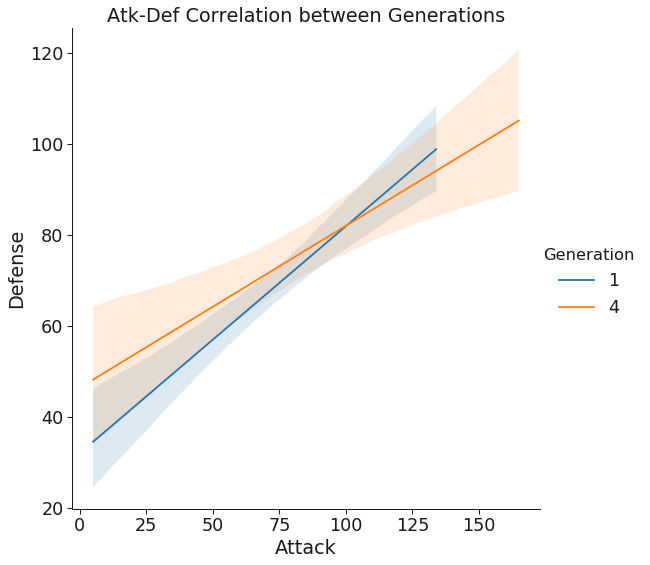

In [394]:
df_gen1_4 = df_pokemon_char[(df_pokemon_char['Generation'] == 1)
                            | (df_pokemon_char['Generation'] == 4)]
sns.set_context("paper", font_scale=2)
sns.lmplot(
    x="Attack",
    y="Defense",
    scatter=False,
    hue='Generation',
    truncate=True,
    height=8,
    data=df_gen1_4)
ax = plt.gca()
ax.set_title("Atk-Def Correlation between Generations")

The correlation between Attack and Defense is positive and greater in magnitude for Generation 1 than Generation 4. Meaning if you had information that a Pokemon had high attack, you are more likely to also have a Pokemon with high defense. However, in general, it may be the case that this correlation is simply that Pokemon with higher stats in any one category are likely to have higher stats overall. Let's check another correlation to see if there is a difference.

Text(0.5,40.736,'Special Attack')

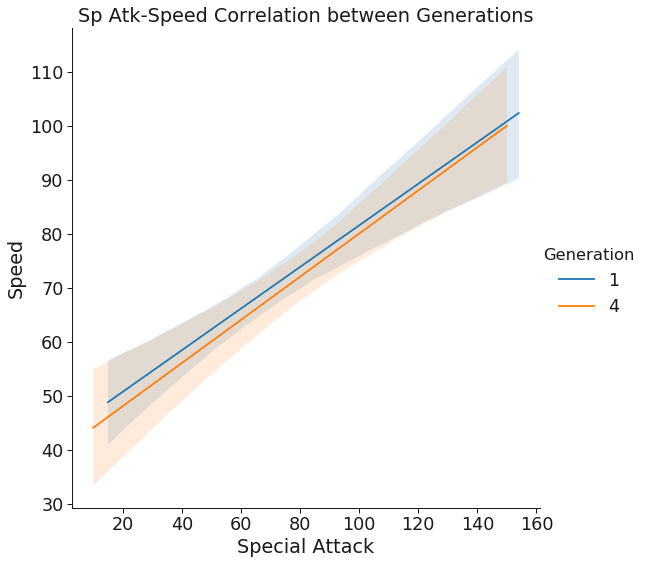

In [439]:
df_gen1_4 = df_pokemon_char[(df_pokemon_char['Generation'] == 1)
                            | (df_pokemon_char['Generation'] == 4)]
sns.set_context("paper", font_scale=2)
sns.lmplot(
    x="Sp_Atk",
    y="Speed",
    scatter=False,
    hue='Generation',
    truncate=True,
    height=8,
    data=df_gen1_4)
ax = plt.gca()
ax.set_title("Sp Atk-Speed Correlation between Generations")
ax.set_xlabel('Special Attack')

Here there is still a strong, positive correlation between the stats (in this case, Speed and Special Attack). Also, there is almost the same correlation across the two Generations. To get a full picture of how each stat covaries, we will use a heatmap of correlations.

[Text(0,0.5,'HP'),
 Text(0,1.5,'Attack'),
 Text(0,2.5,'Defense'),
 Text(0,3.5,'Sp Atk'),
 Text(0,4.5,'Sp Def'),
 Text(0,5.5,'Speed')]

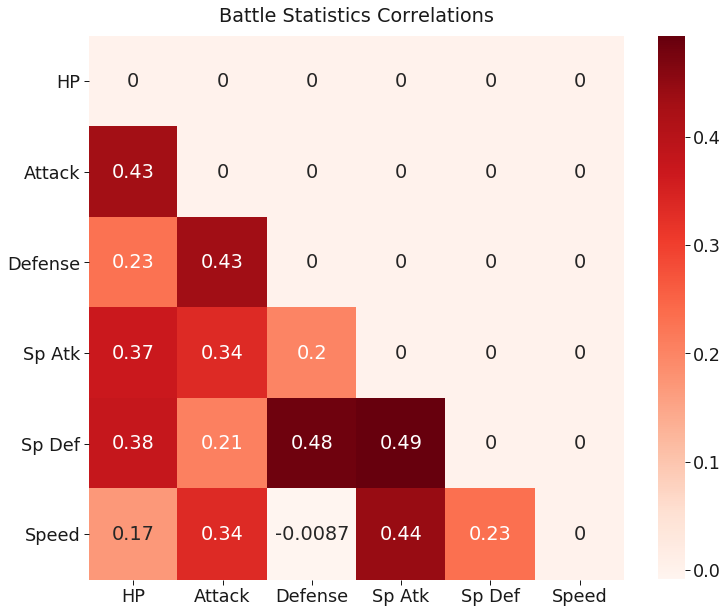

In [442]:
plt.figure(figsize=(12, 10))
corr_mat = df_pokemon_char[[
    'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed'
]].corr()
corr_mat = np.tril(corr_mat, k=-1)
sns.heatmap(corr_mat, cmap="Reds", annot=True)
ax = plt.gca()
ax.set_title("Battle Statistics Correlations", pad=14)
ax.set_xticklabels(['HP', 'Attack', 'Defense', 'Sp Atk', 'Sp Def', 'Speed'])
ax.set_yticklabels(
    ['HP', 'Attack', 'Defense', 'Sp Atk', 'Sp Def', 'Speed'],
    rotation='horizontal')

There are certain pairs of much higher correlation than other pairs, suggesting that those are common groups. There are 
    1. Overall defensive Pokemon that have both high Defense and Special Defense
    2. Special Pokemon with high Special Attack and Special Defense
    3. Physical Pokemon with high Attack and Defense
    4. Fast special attackers 
    5. Strong physical attackers with high HP
It is unlikely to have a fast Pokemon with high HP, Defense or Special Defense. Faster Pokemon are more likely to be offensive. 

Top half of the heatmap was removed because of redundancy.

### Further Analysis across Generations

In [14]:
df_pokemon_char.groupby('Generation')[[
    'hasMegaEvolution', 'Height_m', 'Weight_kg', 'Catch_Rate', 'hasGender',
    'Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed'
]].mean()

hasMegaEvolution  Height_m  Weight_kg  Catch_Rate  hasGender  \
Generation                                                                 
1                   0.086093  1.193841  45.951656  106.185430   0.913907   
2                   0.060000  1.164200  49.105000   91.900000   0.920000   
3                   0.148148  1.231185  67.077778  113.355556   0.881481   
4                   0.046729  1.156262  75.950467   78.859813   0.841121   
5                   0.006410  1.032885  52.402564  103.102564   0.897436   
6                   0.013889  1.080278  51.769444  100.402778   0.902778   

                 Total         HP     Attack    Defense     Sp_Atk     Sp_Def  \
Generation                                                                      
1           407.079470  64.211921  72.549669  68.225166  67.139073  66.019868   
2           406.180000  70.580000  68.260000  69.490000  64.300000  72.140000   
3           402.059259  65.296296  73.111111  68.637037  67.451852  66.244444   
4           445.757009  73.102804  80.401869  75.018692  73.467290  74.289720   
5           425.307692  70.185897  80.839744  71.108974  69.243590  67.333333   
6           429.583333  68.916667  72.500000  75.222222  72.541667  74.722222   

                Speed  
Generation             
1           68.933775  
2           61.410000  
3           61.318519  
4           69.476636  
5           66.596154  
6           65.680556

By generation, the results show that generation 3 received the most post-game attention, returning to give the most mega evolutions. Generation 3 has the tallest pokemon on average, but generation 4 has the greatest average weight by far. Generation 4 also has the hardest pokemon to catch, and generation 3 has the easiest. Early pokemon games had more pokemon genders and this could have to do with the introduction of more types that have on average less gender (check if this is true). Generation 4 has the strongest pokemon on average, and generation 3 has the weakest. This carries through to each of the stat breakdowns where generation 4 is consistently top or near top by each stat, and generation 3 is lowest or near lowest by each stat. 

### Additional Correlations

In [15]:
df_pokemon_char.groupby('Type_1')[[
    'hasMegaEvolution', 'Height_m', 'Weight_kg', 'Catch_Rate', 'hasGender',
    'Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed'
]].mean().corr()

hasMegaEvolution  Height_m  Weight_kg  Catch_Rate  \
hasMegaEvolution          1.000000  0.742575   0.538175   -0.761725   
Height_m                  0.742575  1.000000   0.753458   -0.784464   
Weight_kg                 0.538175  0.753458   1.000000   -0.681562   
Catch_Rate               -0.761725 -0.784464  -0.681562    1.000000   
hasGender                -0.578341 -0.407481  -0.699398    0.493538   
Total                     0.656374  0.757723   0.611759   -0.908336   
HP                        0.087181  0.319257   0.183111   -0.179814   
Attack                    0.530097  0.712583   0.615841   -0.603961   
Defense                   0.478612  0.573501   0.825917   -0.524516   
Sp_Atk                    0.123525  0.049920  -0.163568   -0.353139   
Sp_Def                    0.480218  0.343769   0.278231   -0.489100   
Speed                     0.028073  0.040574  -0.208687   -0.227055   

                  hasGender     Total        HP    Attack   Defense    Sp_Atk  \
hasMegaEvolution  -0.578341  0.656374  0.087181  0.530097  0.478612  0.123525   
Height_m          -0.407481  0.757723  0.319257  0.712583  0.573501  0.049920   
Weight_kg         -0.699398  0.611759  0.183111  0.615841  0.825917 -0.163568   
Catch_Rate         0.493538 -0.908336 -0.179814 -0.603961 -0.524516 -0.353139   
hasGender          1.000000 -0.536063  0.015884 -0.192419 -0.720496 -0.074095   
Total             -0.536063  1.000000  0.353462  0.492692  0.424826  0.537574   
HP                 0.015884  0.353462  1.000000  0.318988 -0.132850  0.048848   
Attack            -0.192419  0.492692  0.318988  1.000000  0.406802 -0.354002   
Defense           -0.720496  0.424826 -0.132850  0.406802  1.000000 -0.242726   
Sp_Atk            -0.074095  0.537574  0.048848 -0.354002 -0.242726  1.000000   
Sp_Def            -0.463316  0.610937  0.249682 -0.093887  0.334042  0.591357   
Speed              0.131329  0.329993  0.050103  0.030799 -0.493328  0.500743   

                    Sp_Def     Speed  
hasMegaEvolution  0.480218  0.028073  
Height_m          0.343769  0.040574  
Weight_kg         0.278231 -0.208687  
Catch_Rate       -0.489100 -0.227055  
hasGender        -0.463316  0.131329  
Total             0.610937  0.329993  
HP                0.249682  0.050103  
Attack           -0.093887  0.030799  
Defense           0.334042 -0.493328  
Sp_Atk            0.591357  0.500743  
Sp_Def            1.000000 -0.219135  
Speed            -0.219135  1.000000

Too dense to go through each correlation, I'll point out just a few to show how this is useful as a future Pokemon master. 

Mega Evolution and height is highly positively correlated, so if you encounter a very large Pokemon, it just might have a coveted Mega Evolution! However, because Mega Evolution and catch rate is highly negatively correlated, it will be hard to catch that Pokemon. Come prepared with some Ultra Balls. 

In general, the higher the Total stats, the more difficult it will be to catch. 

# Looking at Pokemon Battles

Pokemon battles can be complicated. Pokemon can bring up to 4 different moves, each with their own type and special effects. The damage calculation equation below includes 5 different attributes, and doesn't take into account the multiple turns that the battles can take place. 


\begin{align}
Damage & = (\frac{(\frac{2 \times Level}{5}+2) \times Power \times \frac{Atk}{Def}}{50}+2) \times Modifier
\end{align}

Battling is complicated, but there are simulations of previous battles, so we can try to use that.

### Strongest and Weakest Pokemon by Fight Victories

In [22]:
max_wins = 0
strongest_pokemon = []
for i in range(722):
    wins = len(
        df_pokemon_combats[((df_pokemon_combats['First_pokemon'] == i)
                            | (df_pokemon_combats['Second_pokemon'] == i))
                           & (df_pokemon_combats['Winner'] == i)])
    if wins > max_wins:
        max_wins = wins
        strongest_pokemon = [i]
    elif wins == max_wins:
        strongest_pokemon = strongest_pokemon.append(i)
print('The greatest number of wins is', max_wins)

if len(strongest_pokemon) == 1:
    print('The strongest Pokemon is:')
    display(df_pokemon[df_pokemon['#'] == strongest_pokemon])
else:
    print('The strongest Pokemon are:')
    for pokemon in strongest_pokemon:
        display(df_pokemon[df_pokemon['#'] == pokemon])

The greatest number of wins is 152
The strongest Pokemon is:


#    Name   Type 1 Type 2   HP  Attack  Defense  Sp. Atk  Sp. Def  \
162  163  Mewtwo  Psychic    NaN  106     110       90      154       90   

     Speed  Generation  Legendary  
162    130           1       True

In [23]:
max_wins_perc = 0
strongest_pokemon_perc = []
for i in range(722):
    wins_count = len(
        df_pokemon_combats[((df_pokemon_combats['First_pokemon'] == i)
                            | (df_pokemon_combats['Second_pokemon'] == i))
                           & (df_pokemon_combats['Winner'] == i)])
    number_of_battles = len(
        df_pokemon_combats[(df_pokemon_combats['First_pokemon'] == i)
                           | (df_pokemon_combats['Second_pokemon'] == i)])
    if number_of_battles > 0:
        wins_perc = float(wins_count) / number_of_battles
        if number_of_battles >= 10:
            if wins_perc > max_wins_perc:
                max_wins_perc = wins_perc
                strongest_pokemon_perc = [i]
            elif wins_perc == max_wins_perc:
                strongest_pokemon_perc = strongest_pokemon_perc.append(i)
print('The greatest win percent with at least 10 battles is', max_wins_perc)

if len(strongest_pokemon_perc) == 1:
    print('The highest win percentage Pokemon is:')
    display(df_pokemon[df_pokemon['#'] == strongest_pokemon_perc])
else:
    print('The highest win percentage Pokemon are:')
    for pokemon in strongest_pokemon_perc:
        display(df_pokemon[df_pokemon['#'] == pokemon])

The greatest win percent with at least 10 battles is 0.9844961240310077
The highest win percentage Pokemon is:


#             Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  \
154  155  Mega Aerodactyl   Rock  Flying  80     135       85       70   

     Sp. Def  Speed  Generation  Legendary  
154       95    150           1      False

In [24]:
min_wins = len(df_pokemon_combats)
weakest_pokemon = ['none']
for i in range(722):
    wins = len(
        df_pokemon_combats[((df_pokemon_combats['First_pokemon'] == i)
                            | (df_pokemon_combats['Second_pokemon'] == i))
                           & (df_pokemon_combats['Winner'] == i)])
    number_of_battles = len(
        df_pokemon_combats[(df_pokemon_combats['First_pokemon'] == i)
                           | (df_pokemon_combats['Second_pokemon'] == i)])
    if number_of_battles > 1:
        if wins < min_wins:
            min_wins = wins
            weakest_pokemon = [i]
        elif wins == min_wins:
            weakest_pokemon.append(i)
print('The least number of wins is', min_wins, 'out of', number_of_battles,
      'battles.')

if len(weakest_pokemon) == 1:
    print('The weakest Pokemon is:')
    display(df_pokemon[df_pokemon['#'] == weakest_pokemon])
else:
    print('The weakest Pokemon are:')
    for pokemon in weakest_pokemon:
        display(df_pokemon[df_pokemon['#'] == pokemon])

The least number of wins is 0 out of 124 battles.
The weakest Pokemon is:


#     Name Type 1 Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  \
230  231  Shuckle    Bug   Rock  20      10      230       10      230      5   

     Generation  Legendary  
230           2      False

In [427]:
df_top_pokemon = df_pokemon_combats[(
    df_pokemon_combats['First_pokemon'] == df_pokemon_combats['Winner'])]
df_top_6 = df_top_pokemon.groupby('First_pokemon')[
    'Winner'].count().sort_values(ascending=False).head(6)
for i in df_top_6.index:
    display(df_pokemon[df_pokemon['#'] == i]['Name'])

162    Mewtwo
Name: Name, dtype: object

132    Scyther
Name: Name, dtype: object

163    Mega Mewtwo X
Name: Name, dtype: object

512    Weavile
Name: Name, dtype: object

19    Mega Beedrill
Name: Name, dtype: object

431    Deoxys Speed Forme
Name: Name, dtype: object

This is your top team of 6! Good luck filling it out! 

### Predicting Encounter Outcomes

In [59]:
df_battles_first = df_pokemon_combats.merge(
    df_pokemon, left_on='First_pokemon', right_on='#')
df_battles_first.drop(columns=['#'], inplace=True)
first_columns = [
    'first_pokemon', 'second_pokemon', 'winner', 'first_name', 'first_type1',
    'first_type2', 'first_hp', 'first_atk', 'first_def', 'first_spatk',
    'first_spdef', 'first_spd', 'first_gen', 'first_legend'
]
df_battles_first.columns = first_columns
df_battles_second = df_battles_first.merge(
    df_pokemon, left_on='second_pokemon', right_on='#')
df_battles_second.drop(columns=['#'], inplace=True)
second_columns = [
    'second_name', 'second_type1', 'second_type2', 'second_hp', 'second_atk',
    'second_def', 'second_spatk', 'second_spdef', 'second_spd', 'second_gen',
    'second_legend'
]
df_battles_second.columns = first_columns + second_columns
df_battles_second['first_win'] = 1 * (
    df_battles_second['first_pokemon'] == df_battles_second['winner'])
df_battles_second.head()

first_pokemon  second_pokemon  winner first_name first_type1 first_type2  \
0            266             298     298   Larvitar        Rock      Ground   
1             73             298     298     Machop    Fighting         NaN   
2            373             298     298   Whiscash       Water      Ground   
3            536             298     536  Fan Rotom    Electric      Flying   
4            368             298     368   Zangoose      Normal         NaN   

   first_hp  first_atk  first_def  first_spatk  first_spdef  first_spd  \
0        50         64         50           45           50         41   
1        70         80         50           35           35         35   
2       110         78         73           76           71         60   
3        50         65        107          105          107         86   
4        73        115         60           60           60         90   

   first_gen  first_legend second_name second_type1 second_type2  second_hp  \
0          2         False     Nuzleaf        Grass         Dark         70   
1          1         False     Nuzleaf        Grass         Dark         70   
2          3         False     Nuzleaf        Grass         Dark         70   
3          4         False     Nuzleaf        Grass         Dark         70   
4          3         False     Nuzleaf        Grass         Dark         70   

   second_atk  second_def  second_spatk  second_spdef  second_spd  second_gen  \
0          70          40            60            40          60           3   
1          70          40            60            40          60           3   
2          70          40            60            40          60           3   
3          70          40            60            40          60           3   
4          70          40            60            40          60           3   

   second_legend  first_win  
0          False          0  
1          False          0  
2          False          0  
3          False          1  
4          False          1

In [355]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve

# Import models that will later be used
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [443]:
X = df_battles_second[[
    'first_hp', 'first_atk', 'first_def', 'first_spatk', 'first_spdef',
    'first_spd', 'first_legend', 'second_hp', 'second_atk',
    'second_def', 'second_spatk', 'second_spdef', 'second_spd',
    'second_legend'
]]
Y = df_battles_second['first_win'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [446]:
# Compare Performance of Classification Algorithms
def compareABunchOfDifferentModelsAccuracy(a, b, c, d):
    """
    compare performance of classifiers on X_train, X_test, Y_train, Y_test
    """
    print('')
    print('Compare Multiple Classifiers:')
    print('')
    print('K-Fold Cross-Validation Accuracy:')
    print('')
    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('RF', RandomForestClassifier()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('SVM', SVC()))
    models.append(('LSVM', LinearSVC()))
    models.append(('GNB', GaussianNB()))
    models.append(('DTC', DecisionTreeClassifier()))
    models.append(('GBC', GradientBoostingClassifier()))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    resultsAccuracy = []
    names = []
    for name, model in models:
        model.fit(a, b)
        kfold = model_selection.KFold(n_splits=10)
        accuracy_results = model_selection.cross_val_score(
            model, c, d, cv=kfold, scoring='accuracy')
        resultsAccuracy.append(accuracy_results)
        names.append(name)
        accuracyMessage = "%s: %f (%f)" % (name, accuracy_results.mean(),
                                           accuracy_results.std())
        print(accuracyMessage)
    # boxplot algorithm comparison
    fig = plt.figure(figsize=(18, 10))
    fig.suptitle('Algorithm Comparison: Battle Prediction Accuracy', fontsize=40)
    ax = fig.add_subplot(111)
    plt.boxplot(resultsAccuracy)
    ax.set_xticklabels(names)
    ax.tick_params(pad=12, labelsize=22)
    ax.set_ylabel('Cross-Validation: Accuracy Score', fontsize=32, labelpad=20)
    plt.show()
    return


def defineModels():
    """
    This function just defines each abbreviation used in the previous function (e.g. LR = Logistic Regression)
    """
    print('')
    print('LR = LogisticRegression')
    print('RF = RandomForestClassifier')
    print('KNN = KNeighborsClassifier')
    print('SVM = Support Vector Machine SVC')
    print('LSVM = LinearSVC')
    print('GNB = GaussianNB')
    print('DTC = DecisionTreeClassifier')
    print('GBC = GradientBoostingClassifier')
    print('LDA = LinearDiscriminantAnalysis')
    print('')
    return


Compare Multiple Classifiers:

K-Fold Cross-Validation Accuracy:

LR: 0.879700 (0.011217)
RF: 0.904700 (0.011524)
KNN: 0.847600 (0.016572)
SVM: 0.535200 (0.010815)
LSVM: 0.719600 (0.092462)
GNB: 0.780300 (0.010296)
DTC: 0.900000 (0.008355)
GBC: 0.912000 (0.011533)
LDA: 0.877900 (0.011853)


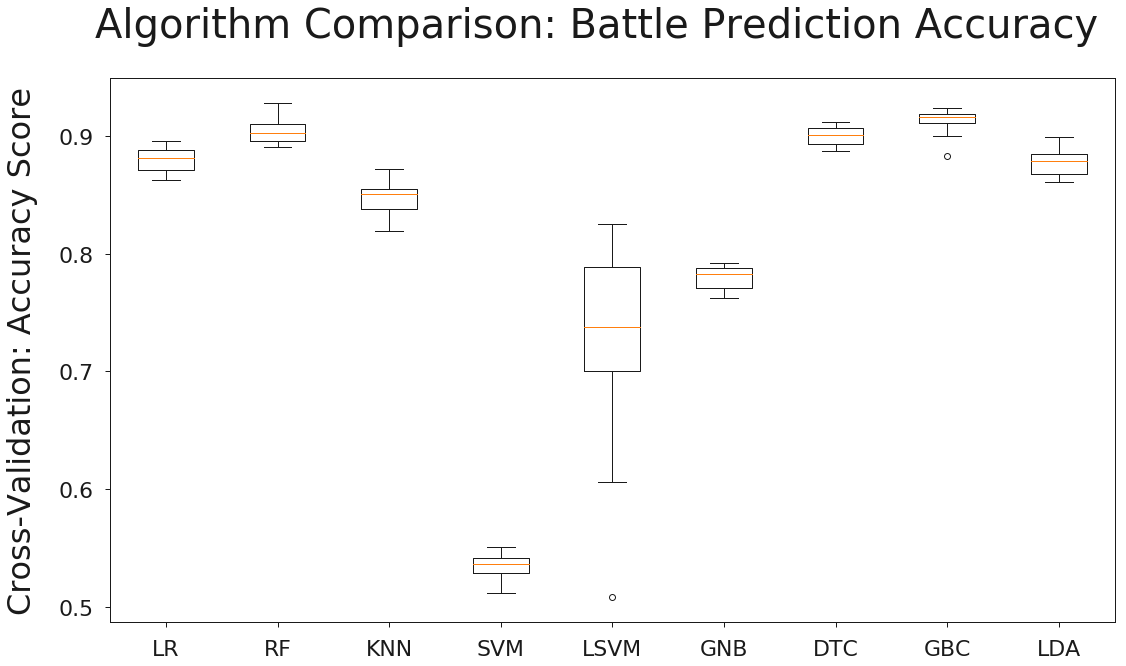


LR = LogisticRegression
RF = RandomForestClassifier
KNN = KNeighborsClassifier
SVM = Support Vector Machine SVC
LSVM = LinearSVC
GNB = GaussianNB
DTC = DecisionTreeClassifier
GBC = GradientBoostingClassifier
LDA = LinearDiscriminantAnalysis



In [447]:
compareABunchOfDifferentModelsAccuracy(X_train, Y_train, X_test, Y_test)
defineModels()

Gradient Boosting and Random Forest classifier provide the highest accuracy of around 90%. Strangely, SVM's accuracy is barely over completely random change (50%). For predicting the outcome of future endeavors, Gradient Boosting Classifier is likely the best option.

There are a lot of additional factors missing such as moveset (the 4 moves a Pokemon has available to use in a given fight), but with just the information a basic Pokedex would supply, high accuracy predictions are possible. And so, we move towards providing a Pokedex.

# Creating a Pokedex

A Pokedex is a device that allows a Pokemon trainer to search for a Pokemon's statistics and other information by searching its name or Pokedex number.

In [26]:
all_sprite_files = []
for entry in os.scandir('/Users/benrichman/Desktop/icons'):
    if entry.is_file():
        all_sprite_files.append(entry.path)
# minimum file length will be the length of all files for pokemon
# images that are not mega evolutions or alternate sprites for the same pokemon
min_file_length = len(all_sprite_files[0])
for i in all_sprite_files:
    if len(i) < min_file_length:
        min_file_length = len(i)
sprite_files = []
for i in all_sprite_files:
    if len(i) == min_file_length:
        sprite_files.append(i)
sprite_numbers = []
for i in sprite_files:
    sprite_numbers.append(i[32:35])

In [27]:
sprite_dict = {'sprite_file': sprite_files, 'sprite_number': sprite_numbers}
df_sprites = pd.DataFrame(sprite_dict).sort_values(
    by='sprite_number').set_index('sprite_number')
df_sprites.drop(['000'], inplace=True)

In [434]:
print('Test that the images loaded: Charmeleon')
Image(df_sprites['sprite_file'][4], width=100, height=100)

Test that the images loaded: Charmeleon


In [ ]:
def make_3_digits(x):
    """
    Format input numbers into a 3 digit format
    """
    return "{:03}".format(x)

In [30]:
df_pokemon_char['pokedex_number'] = df_pokemon_char['Number'].apply(
    make_3_digits)
df_pokedex = df_pokemon_char.merge(
    df_sprites, left_on='pokedex_number', right_index=True)
df_pokedex.head()

Number        Name Type_1  Type_2  Total  HP  Attack  Defense  Sp_Atk  \
0       1   Bulbasaur  Grass  Poison    318  45      49       49      65   
1       2     Ivysaur  Grass  Poison    405  60      62       63      80   
2       3    Venusaur  Grass  Poison    525  80      82       83     100   
3       4  Charmander   Fire     NaN    309  39      52       43      60   
4       5  Charmeleon   Fire     NaN    405  58      64       58      80   

   Sp_Def  Speed  Generation  isLegendary  Color  hasGender  Pr_Male  \
0      65     45           1        False  Green       True    0.875   
1      80     60           1        False  Green       True    0.875   
2     100     80           1        False  Green       True    0.875   
3      50     65           1        False    Red       True    0.875   
4      65     80           1        False    Red       True    0.875   

  Egg_Group_1 Egg_Group_2  hasMegaEvolution  Height_m  Weight_kg  Catch_Rate  \
0     Monster       Grass             False      0.71        6.9          45   
1     Monster       Grass             False      0.99       13.0          45   
2     Monster       Grass              True      2.01      100.0          45   
3     Monster      Dragon             False      0.61        8.5          45   
4     Monster      Dragon             False      1.09       19.0          45   

       Body_Style pokedex_number                              sprite_file  
0       quadruped            001  /Users/benrichman/Desktop/icons/001.png  
1       quadruped            002  /Users/benrichman/Desktop/icons/002.png  
2       quadruped            003  /Users/benrichman/Desktop/icons/003.png  
3  bipedal_tailed            004  /Users/benrichman/Desktop/icons/004.png  
4  bipedal_tailed            005  /Users/benrichman/Desktop/icons/005.png

## Making the Pokedex

In [346]:
def create_pokedex(pokedex_number):
    """
    Using an input from the user, create a Plotly Pokedex that displays the 
    statistics of the desired Pokemon in the form of a horizontal bar plot.
    """
    pokedex_number = "{:0>3}".format(pokedex_number)
    #sprite_name = str(pokedex_number) + '.png'
    df_barplot = df_pokedex[df_pokedex['pokedex_number'] == pokedex_number][[
        'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed'
    ]]
    df_barplot.columns = [
        'HP', 'Attack', 'Defense', 'Sp Atk', 'Sp Def', 'Speed'
    ]
    df_barplot = df_barplot.transpose()
    df_barplot.columns = ['stats']
    pokedex_title = "Pokedex: " + \
        df_pokedex[df_pokedex['pokedex_number'] ==
                    pokedex_number]['Name'].values + " Statistics"
    annotation_text = "Total Base Stats:\n " + \
        str(df_barplot['stats'].sum())
    clrs = [
        'gray' if (x < df_barplot['stats'].max()) else '#4C9D49'
        for x in df_barplot['stats']
    ]
    init_notebook_mode(connected=True)
    data = [
        go.Bar(
            x=df_barplot['stats'],
            y=df_barplot.index,
            orientation='h',
            text=df_barplot['stats'],
            textposition='auto',
            textfont=dict(family='sans serif', size=18, color='black'),
            hoverinfo='none',
            marker=dict(
                color=clrs,
                line=dict(color='rgb(8,48,107)', width=1.5),
            ),
            opacity=0.6)
    ]

    layout = go.Layout(
        title="Pokedex: " + ''.join(df_pokedex[df_pokedex['pokedex_number'] ==
                                               pokedex_number]['Name'].values)
        + " Statistics",
        titlefont=dict(family='Arial', size=36),
        yaxis=dict(
            showticklabels=True,
            tickfont=dict(
                family='Old Standard TT, serif', size=24, color='black'),
        ),
        xaxis=dict(
            title='Base Stat Value',
            titlefont=dict(family='Arial, sans-serif', size=32, color='black'),
            range=[0, df_barplot['stats'].max() + 20],
            showticklabels=True,
            tickfont=dict(
                family='Old Standard TT, serif', size=24, color='black'),
        ),
        annotations=[
            dict(
                x=df_barplot['stats'].max() + 10,
                y=0.5,
                xref='x',
                yref='y',
                text=annotation_text,
                ax=1,
                ay=1,
                font=dict(size=24, color='black'),
                align='center',
                arrowwidth=2,
                bordercolor='black',
                borderwidth=2,
                borderpad=4,
                bgcolor='white')
        ])
    # images=[
    # dict(source=sprite_name, xref="x", yref="y", x=df_barplot['stats'].max()+4, y=4, sizex=13, sizey=1.7,
    # sizing="stretch", xanchor="left", yanchor="bottom")])

    fig = go.Figure(data=data, layout=layout)
    plotly.offline.iplot(fig, filename='pokedex')
    print('\n')
    display(df_pokedex[df_pokedex['pokedex_number'] == pokedex_number])

In [348]:
number_or_name = int(
    input('Search by Pokedex number (1) or Pokemon name (2)?'))
if number_or_name == 1:
    pokedex_number = int(input('Provide the Pokedex number: '))
    if pokedex_number not in range(len(df_pokedex) + 1):
        print(
            "The input value " + pokedex_number +
            " is not a valid Pokedex number. Please input a number between 1 and 721"
        )
    else:
        create_pokedex(pokedex_number)

elif number_or_name == 2:
    pokemon_name = input('Provide the Pokemon name: ')
    df_names = df_pokedex['Name']
    all_names = list(df_names.values)
    if pokemon_name not in all_names:
        print("The input value " + pokemon_name +
              " is not a valid Pokemon name. Please try again.")
    else:
        pokedex_number = int(df_pokedex[df_pokedex['Name'] == pokemon_name][
            'pokedex_number'].values[0])
        create_pokedex(pokedex_number)
else:
    print(
        'Please press 1 for searching by Pokedex number and 2 for searching by Pokemon name. Try again.'
    )

Search by Pokedex number (1) or Pokemon name (2)?2
Provide the Pokemon name: Pikachu


Number     Name    Type_1 Type_2  Total  HP  Attack  Defense  Sp_Atk  \
24      25  Pikachu  Electric    NaN    320  35      55       40      50   

    Sp_Def  Speed  Generation  isLegendary   Color  hasGender  Pr_Male  \
24      50     90           1        False  Yellow       True      0.5   

   Egg_Group_1 Egg_Group_2  hasMegaEvolution  Height_m  Weight_kg  Catch_Rate  \
24       Field       Fairy             False      0.41        6.0         190   

   Body_Style pokedex_number                              sprite_file  
24  quadruped            025  /Users/benrichman/Desktop/icons/025.png

This Pokedex provides the 6 statistical breakdowns of a particular Pokemon as well as the sum of the base stats. If you did know a Pokemon by its number (as is stored in the Pokedex), then you could search by that, or if you know the name, then that is another search option. The highest stats of that particular Pokemon show up in green, while the rest show up in grey. This is the tool every budding Pokemon master needs - it will allow you to search and display the relevant information for a cursory understanding of the new Pokemon's stats, and gives you the relevant information to predict the outcome of the battle. 

Included in the second half of the code is a piece for displaying the Pokemon sprite (commented out). However, due to limitations in Plotly, it was not included as the image will only display if the sprite file is stored locally inside the notebook directory in offline mode. 